In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
t = titles
t.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 13
The Three Musketeers    12
The Outsider            11
Maya                    11
Blood Money             11
She                     11
Love                    10
Othello                 10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [9]:
t = titles
t = t[t.year //10 == 193]
t.year.value_counts().head(3)

1937    1181
1936    1122
1938    1118
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

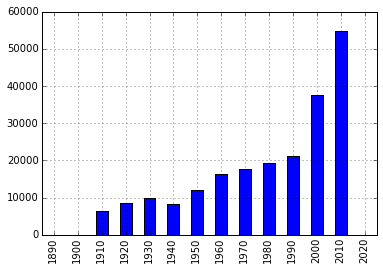

In [15]:
t = titles
(t.year //10 *10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

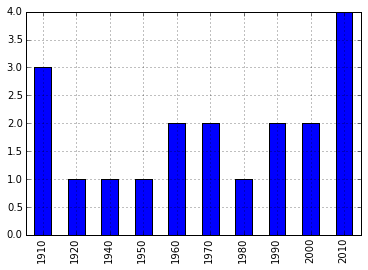

In [27]:
t = titles
t = t[t.title == 'Hamlet']
t = (t.year//10 *10).value_counts().sort_index()
t.plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

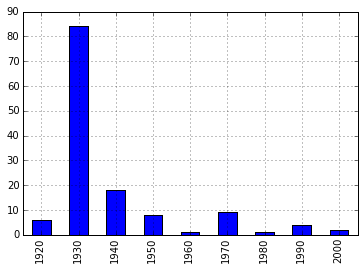

In [33]:
c= cast
c = c[c.character == 'Rustler']
c = (c.year //10 *10).value_counts().sort_index()
c.plot(kind='bar')

### Plot the number of "Batman" characters each decade.

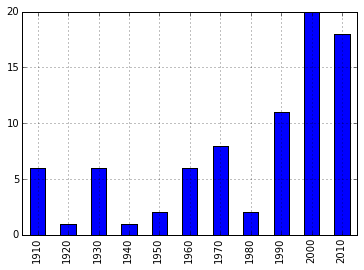

In [35]:
c= cast
c = c[c.character == 'Hamlet']
c = (c.year //10 *10).value_counts().sort_index()
c.plot(kind='bar')

### What are the 11 most common character names in movie history?

In [37]:
c = cast
c = c.character.value_counts().head(11)
c

Himself        18807
Dancer         10933
Extra           8637
Reporter        7545
Doctor          6733
Policeman       6434
Student         6278
Nurse           6092
Bartender       6065
Minor Role      5796
Party Guest     5738
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [41]:
c = cast
c = c[c.character == 'Herself']
c.name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      8
Mary Jo Pehl           7
Joan Rivers            7
Bunny Yeager           5
Chris Evert            5
Juhi Chawla            5
Kareena Kapoor         5
Marilyn Monroe         5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [43]:
c = cast
c = c[c.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler             92
Richard Nixon            38
Ronald Reagan            29
John F. Kennedy          26
Ron Jeremy               23
Winston Churchill        21
Bill Clinton             20
Franklin D. Roosevelt    20
George W. Bush           20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [48]:
c = cast
c = c[c.year == 1945].name.value_counts()
c.head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       28
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Edmund Cobb         24
Pierre Watkin       24
Franklyn Farnum     24
Charles Sullivan    24
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [49]:
c = cast
c = c[c.year == 1985].name.value_counts()
c.head(10)

Shakti Kapoor    19
Mammootty        17
Sukumari         16
Lou Scheimer     15
Aruna Irani      14
Deven Verma      13
Raj Babbar       13
Rajesh Khanna    13
Mohanlal         13
Jagdish Raj      12
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

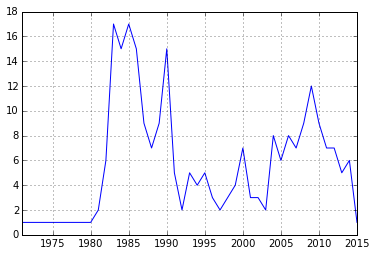

In [57]:
c = cast
c = c[c.name == 'Mammootty'].year.value_counts().sort_index()
c.plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [60]:
c = cast
c = c[c.character.str.startswith('Patron in')].character.value_counts().head(10)
c

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in restaurant             3
Patron in Restaurant             3
Patron in Club                   3
Patron in Coffee Shop            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [61]:
c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         53
Science Student          8
Science Fair Student     8
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science teacher          3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

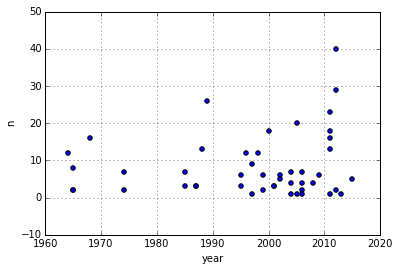

In [64]:
c = cast
c = c[c.name == 'Judi Dench']
c = c[c.n.notnull()]
c.plot(x='year',y='n',kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

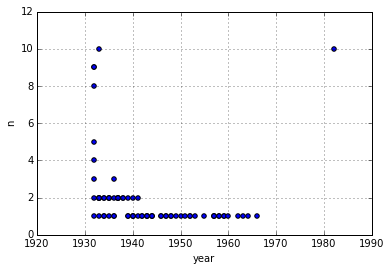

In [65]:
c = cast
c = c[c.name == 'Cary Grant']
c = c[c.n.notnull()]
c.plot(x='year',y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

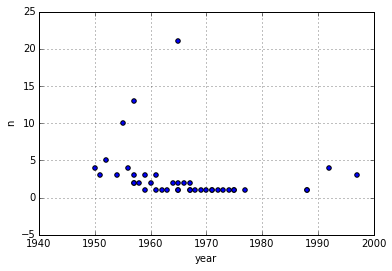

In [66]:
c = cast
c = c[c.name == 'Sidney Poitier']
c = c[c.n.notnull()]
c.plot(x='year',y='n',kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [71]:
c = cast
c = c[c.year//10 ==195]
c = c[c.n ==1]
c.type.value_counts()

actor      6363
actress    2804
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [72]:
c = cast
c = c[c.year//10 ==195]
c = c[c.n ==2]
c.type.value_counts()

actress    4385
actor      4372
dtype: int64